In [10]:
import pickle

with open('data_preparation/kialo_data/1_raw_data/dumped_discussions_first.pickle', 'rb') as f:
    discussions = pickle.load(f)


In [11]:
# Check the first few entries
first_few_discussions = discussions[:2]
first_few_discussions


[{'discussion': {'claims': [{'id': '333.0',
     'authorId': '0077c272-1fdc-4202-a06a-160482dfc12d',
     'created': 1382962412430,
     'version': 2,
     'text': 'Anonymous currency discussions',
     'lastModifiedForSitemaps': 1382962412430},
    {'id': '333.1',
     'authorId': '0077c272-1fdc-4202-a06a-160482dfc12d',
     'created': 1382962412434,
     'version': 4,
     'text': 'An anonymous untrackable digital currency \\(ADC\\), like Bitcoin, is beneficial for civilized societies.',
     'lastModifiedForSitemaps': 1382962412434},
    {'id': '333.2',
     'authorId': '0077c272-1fdc-4202-a06a-160482dfc12d',
     'created': 1382962534883,
     'version': 7,
     'text': "Cash is a necessary part of any functional society's economic model and cryptocurrencies are an easier and online-ready form of cash. They are the natural progression of what money is becoming in the digital age.",
     'lastModifiedForSitemaps': 1519262762906},
    {'id': '333.3',
     'authorId': '0077c272-1fdc-4

(TODO: Change to readable format)# Data Conversion

The JSON structure is converted to dataframes, which facilitates data analysis

In [12]:
# Importing the required library for data conversion
import pandas as pd

# Initializing empty lists to store the flattened data
flattened_discussions = []
flattened_claims = []
flattened_positions = []

# Looping through each discussion to flatten the data structure
for discussion in discussions:
    # Extracting discussion-level attributes
    discussion_id = discussion.get("title", None)
    background_info = discussion.get("background info", None)

    # Appending to the discussion list
    flattened_discussions.append({
        'title': discussion_id,
        'background_info': background_info
    })

    # Looping through claims in each discussion
    claims = discussion.get("discussion", {}).get("claims", [])
    for claim in claims:
        claim['discussion_title'] = discussion_id  # Adding the discussion ID for reference
        flattened_claims.append(claim)

    # Looping through positions in each discussion
    positions = discussion.get("discussion", {}).get("locations", [])
    for position in positions:
        position['discussion_title'] = discussion_id  # Adding the discussion ID for reference
        flattened_positions.append(position)

# Converting the lists to Pandas DataFrames
df_discussions = pd.DataFrame(flattened_discussions)
df_claims = pd.DataFrame(flattened_claims)
df_positions = pd.DataFrame(flattened_positions)

# Showing the first few rows of each DataFrame to check the structure (TODO add diagram to show this relations)
print("discussions \n")
print()
print(df_discussions.head())
print("claims \n")
print()
print(df_claims.head())
print("positions \n")
print()
print(df_positions.head())


discussions 


                                               title  \
0  Are Bitcoin and Similar Cryptocurrencies Good ...   
1             Should we Have a 100% Inheritance Tax?   
2  Autonomous Killing Machines: The Future of War...   
3  Is Capital Punishment in the United States jus...   
4  The world would be better off without organize...   

                                     background_info  
0  In recent years, a surge in its value catapult...  
1  The lottery of birth is sometimes very literal...  
2  Should the West build military killer robots? ...  
3  Capital punishment, or the death penalty, has ...  
4                                                     
claims 


      id                              authorId        created  version  \
0  333.0  0077c272-1fdc-4202-a06a-160482dfc12d  1382962412430        2   
1  333.1  0077c272-1fdc-4202-a06a-160482dfc12d  1382962412434        4   
2  333.2  0077c272-1fdc-4202-a06a-160482dfc12d  1382962534883        7   
3  333.3  00

## Understand Data Structure

### 1. df_discussions
The DataFrame `df_discussions` contains titles and background information for each discussion.

**Columns:**
- `title`: Title of the discussion.
- `background_info`: Additional context or background information related to the discussion.

### 2. df_claims
The DataFrame `df_claims` contains the claims and associated metadata.

**Columns:**
- `id`: ID of the claim. The number behind the decimal place refers to the title id of the discussion (0.0 => 0, 0.1 => 1)
- `authorId`: ID of the claim's author.
- `created`: Timestamp when the claim was created.
- `version`: Number of times the claim has been edited.
- `text`: Text content of the claim.
- `lastModifiedForSitemaps`: Timestamp of the last modification.
- `discussion_title`: Title of the discussion to which the claim belongs.
- `flag`: Metadata related to the claim (e.g. Unsupported, Not a claim, etc.).
- `copierId`: ID of the user who copied the claim (if applicable).
- `accepterId`: ID of the user who accepted the claim (if applicable).
- `discussionLinkTo`: Link to the discussion to which the claim belongs (if applicable).

### 3. df_positions
The DataFrame `df_positions` contains the positions (or locations) and associated metadata. It captures the relationships (PRO or CON) between claims, indicating which claim is a response to another and if it´s supporting it or not.

**Columns:**
- `id`: ID of the position.
- `targetId`: ID of the target claim.
- `version`: Number of times the position has been edited.
- `isOrigin`: Boolean value indicating whether the position is the origin of the discussion.
- `authorId`: ID of the position's author.
- `created`: Timestamp when the position was created.
- `parentId`: ID of the parent claim.
- `relation`: Stance type (Pro or Con).
- `isDeleted`: Boolean value indicating whether the position is deleted.
- `lastModifiedForSitemaps`: Timestamp of the last modification.
- `discussion_title`: Title of the discussion to which the position belongs.
- `flag`: Metadata related to the position (e.g. Unsupported, Not a position, etc.).
- `copierId`: ID of the user who copied the position (if applicable).
- `accepterId`: ID of the user who accepted the position (if applicable).


### Types of Marks (Flags)

According to [Kialo's support page](https://support.kialo.com/en/hc/types-of-mark/), there are 8 different types of marks (or flags) that can be used when marking a claim for review. A claim can be marked (or flagged) with up to 2 different types of mark at a time.

1. **Unsupported**: The claim lacks evidence, either in the form of linked sources or explanatory Pros underneath it.
2. **Not a claim**: A claim must be making an argument, arguing for or against the claim or thesis located above it. Anything that does not do so is not adding to the argument at hand, and therefore is not a claim; this mark is used to point out that problem.
3. **Unclear**: This mark should be used to indicate that the user marking the claim does not understand the meaning of the claim or some aspect of it, or doubts that other readers are able to easily do so.
4. **Vulgar/abusive**: This claim is insulting, overly offensive, or unnecessarily vulgar in expression. Kialo aims to provide the greatest degree of freedom of expression, but this should not be misused to attack or insult others – this mark is used to draw an Admin’s attention to serious misuse of the platform.
5. **Duplicate claim**: The claim repeats another existing claim in the discussion, either in part or in full. This often happens accidentally, when the same claim is created twice or when a claim restates its parent using different wording, consequently not adding anything new to the discussion.
6. **Unrelated**: While the claim is an argument, it does not make a logical connection to its parent, either supporting or attacking it. Therefore, it is potentially irrelevant in its current location.
7. **More than one claim**: The claim contains content that should probably be split into multiple claims.
8. **Move elsewhere**: The claim would fit better at a different location. This mark clears automatically if the claim is moved.

# Data Cleaning (1)
## Selecting Columns
- `copierId` , `accepterId` and `discussionLinkTo` of positions and claims dataframes have been removed for now cause they do not provide an obvious benefit to understanding the flow of a conversation. 
- Also the df_claims_clean etc. do not contain isOrigin and versions of positions which have been added in this new version since they can provide information about recency and about location. 

In [13]:
# Keeping relevant columns
df_claims_clean = df_claims[
    ['id', 'authorId', 'created', 'text', 'version', 'flag', 'lastModifiedForSitemaps', 'discussion_title']]
df_positions_clean = df_positions[
    ['id', 'authorId', 'created', 'version', 'isOrigin', 'parentId', 'targetId', 'relation', 'isDeleted',
     'lastModifiedForSitemaps', 'discussion_title']]

# Filtering out deleted positions
df_positions_clean = df_positions_clean[df_positions_clean['isDeleted'] == False]

# TODO : remove isDeleted attribute?

## Renaming Columns

The column names of the `df_claims_clean` and `df_positions_clean` DataFrames are being updated for better understanding. 

### df_claims_clean

The following columns in `df_claims_clean` DataFrame are renamed such that we can distinguish attribute names between positions and claims easily:

- `id` is renamed to `claimId`
- `created` is renamed to `claimCreated`
- `text` is renamed to `claimText`
- `lastModifiedForSitemaps` is renamed to `lastModified`: This change simplifies the column name to what is relevant for the thesis. 


### df_positions_clean

The following columns in `df_positions_clean` DataFrame are renamed:

- `id` is renamed to `positionId`
- `targetId` is renamed to `sourceClaimId`
- `parentId` is renamed to `targetClaimId`
- `relation` is renamed to `stanceType`: This change clarifies whether a claim is Pro (1) or Con (-1) in relation to its parent.
- `lastModifiedForSitemaps` is renamed to `lastModified`

In [14]:

# Renaming the columns for better clarity
df_claims_clean = df_claims_clean.rename(columns={
    'id': 'claimId',
    'created': 'claimCreated',
    'text': 'claimText',
    'lastModifiedForSitemaps': 'lastModified'
})

df_positions_clean = df_positions_clean.rename(columns={
    'id': 'positionId',
    'targetId': 'sourceClaimId',
    'parentId': 'targetClaimId',
    'relation': 'stanceType',
    'lastModifiedForSitemaps': 'lastModified'
})

df_claims_clean.head(), df_positions_clean.head()

(  claimId                              authorId   claimCreated  \
 0   333.0  0077c272-1fdc-4202-a06a-160482dfc12d  1382962412430   
 1   333.1  0077c272-1fdc-4202-a06a-160482dfc12d  1382962412434   
 2   333.2  0077c272-1fdc-4202-a06a-160482dfc12d  1382962534883   
 3   333.3  0077c272-1fdc-4202-a06a-160482dfc12d  1382962630371   
 4   333.4  0077c272-1fdc-4202-a06a-160482dfc12d  1382962663127   
 
                                            claimText  version flag  \
 0                     Anonymous currency discussions        2  NaN   
 1  An anonymous untrackable digital currency \(AD...        4  NaN   
 2  Cash is a necessary part of any functional soc...        7  NaN   
 3  Most ordinary citizens would not use such a cu...        5  NaN   
 4  Most people pay taxes and banks report all the...        4  NaN   
 
     lastModified                                   discussion_title  
 0  1382962412430  Are Bitcoin and Similar Cryptocurrencies Good ...  
 1  1382962412434  Are Bit

## Timestamps

In [35]:
df_claims_clean_with_features = pd.read_csv(
    "data_preparation/kialo_data/2_cleaned_data_JSON/df_claims_clean_with_features.csv")

# Convert Unix timestamps to human-readable date-time format
df_claims_clean_with_features['claimCreated_readable'] = pd.to_datetime(df_claims_clean_with_features['claimCreated'],
                                                                        unit='ms')
df_claims_clean_with_features['lastModified_readable'] = pd.to_datetime(df_claims_clean_with_features['lastModified'],
                                                                        unit='ms')
df_positions_clean['lastModified_readable'] = pd.to_datetime(df_positions_clean['lastModified'], unit='ms')


In [ ]:
# Save the updated DataFrames for future use
df_claims_clean_with_features.to_csv('data_preparation/kialo_data/2_cleaned_data_JSON', index=False)
df_positions_clean.to_csv('data_preparation/kialo_data/2_cleaned_data_JSON', index=False)


#### Flags
Flags contain multiple types, often with a 'reason' attached. 

In [22]:
# Converting the 'flag' column to a string representation to handle unhashable types like dictionaries
df_claims_clean['flag_str'] = df_claims_clean['flag'].astype(str)

# Checking unique flag types TODO: "nan" value remove ? 
unique_flags = df_claims_clean['flag_str'].unique()
print(unique_flags)

['nan'
 "{'flagType': 3, 'reason': 'see comments, also seems to be unrelated'}"
 "{'flagType': 1, 'reason': ''}" ...
 "{'flagType': 1, 'reason': 'This is written as a personal experience. It would work better if it was written as a nonpersonal statement.'}"
 "{'flagType': 0, 'reason': 'Needs a source as suggested in the comments.'}"
 "{'flagType': 0, 'reason': 'marking as a reminder to find a source'}"]


# Feature Engineering

In this section, the `version` and `lastModified` features in the df_claims_clean DataFrame are analyzed because they both provide information about time.


In [23]:
# Analyzing 'version' and 'lastModified' further
version_stats = df_claims_clean['version'].describe()
last_modified_stats = df_claims_clean['lastModified'].describe()
print(version_stats)
print()
print(last_modified_stats)

count    679485.000000
mean          1.802965
std           1.327406
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          46.000000
Name: version, dtype: float64

count    6.794850e+05
mean     1.559772e+12
std      4.513152e+10
min      1.380182e+12
25%      1.524335e+12
50%      1.560927e+12
75%      1.595252e+12
max      1.634713e+12
Name: lastModified, dtype: float64


### Observations for Time Features

#### Version
- Count: 679,485
- Mean: ~1.8
- Max: 46

Most claims have a version number around 1-2, indicating that many claims are not modified multiple times.

#### Last Modified 

TODO : Change to readable format

- Mean Timestamp: ~1.56e12  
- Max Timestamp: ~1.63e12

The `lastModified` feature varies significantly, which could be useful for recency information.

#### RecencyComplexity Score

The 75th percentile is a robust normalization factor, reducing outlier influence and balancing between median and maximum. It ensures exceptional cases stand out without losing crucial data.

Before applying this normalization, it's important to verify that it won't eliminate important data. We can do this by plotting the distribution of the data before and after applying the normalization:

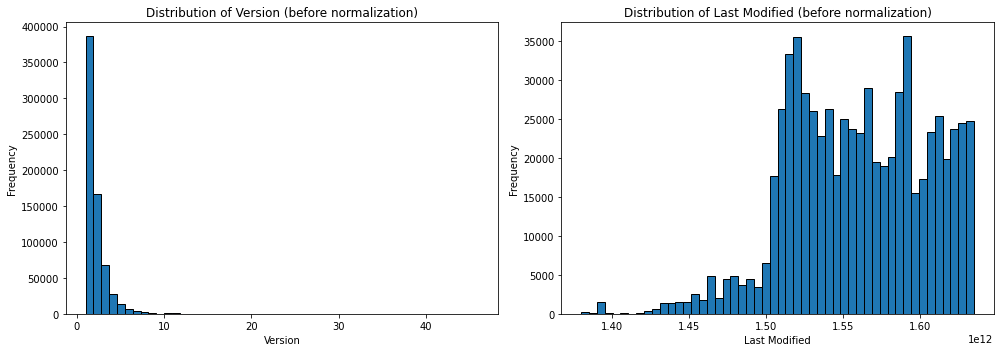

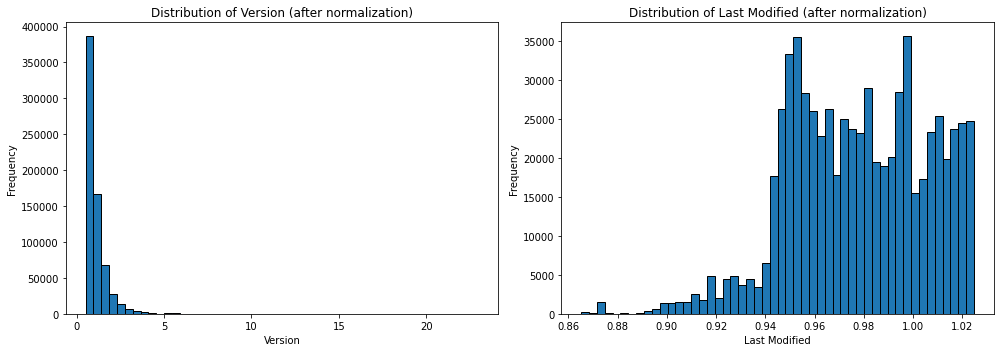

In [24]:
import matplotlib.pyplot as plt

# Plot before normalization
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_claims_clean['version'], bins=50, edgecolor='black')
axs[0].set_title('Distribution of Version (before normalization)')
axs[0].set_xlabel('Version')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_claims_clean['lastModified'], bins=50, edgecolor='black')
axs[1].set_title('Distribution of Last Modified (before normalization)')
axs[1].set_xlabel('Last Modified')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate the 75th percentile for 'version' and 'lastModified'
version_75th_percentile = df_claims_clean['version'].quantile(0.75)
last_modified_75th_percentile = df_claims_clean['lastModified'].quantile(0.75)

# Normalize 'version' and 'lastModified' using the 75th percentile
df_claims_clean['version_normalized'] = df_claims_clean['version'] / version_75th_percentile
df_claims_clean['lastModified_normalized'] = df_claims_clean['lastModified'] / last_modified_75th_percentile

# Plot after normalization
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].hist(df_claims_clean['version_normalized'], bins=50, edgecolor='black')
axs[0].set_title('Distribution of Version (after normalization)')
axs[0].set_xlabel('Version')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_claims_clean['lastModified_normalized'], bins=50, edgecolor='black')
axs[1].set_title('Distribution of Last Modified (after normalization)')
axs[1].set_xlabel('Last Modified')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Looks like the majority of the data was not cut off.

# Data Exploration

## Subset 1 ('RecencyComplexityScore', 'NumFlags', 'claimCreated', 'version', 'lastModified')

TODO: Subset 2 and 3

In [30]:
# Reload the saved DataFrame with new features to continue with the analysis
df_claims_clean = pd.read_csv('./data_preparation/kialo_data/2_cleaned_data_JSON/df_claims_clean_with_features.csv')

# Perform the descriptive statistics on a smaller subset of the data to avoid computational issues
desc_stats_subset = df_claims_clean.sample(frac=0.1, random_state=42)[
    ['RecencyComplexityScore', 'NumFlags', 'claimCreated', 'version', 'lastModified']].describe()

# Calculate correlations between the features on the same subset
correlations_subset = df_claims_clean.sample(frac=0.1, random_state=42)[
    ['RecencyComplexityScore', 'NumFlags', 'claimCreated', 'version', 'lastModified']].corr()

print("description of statistics")
print()
print(desc_stats_subset)
print()
print("correlations of variables ")
print()
print(correlations_subset)


description of statistics

       RecencyComplexityScore      NumFlags  claimCreated       version  \
count            67948.000000  67948.000000  6.794800e+04  67948.000000   
mean                 0.938930      0.072246  1.549324e+12      1.799641   
std                  0.335827      0.405714  4.392105e+10      1.342231   
min                  0.682597      0.000000  1.380183e+12      1.000000   
25%                  0.737685      0.000000  1.517979e+12      1.000000   
50%                  0.757151      0.000000  1.542208e+12      1.000000   
75%                  0.997683      0.000000  1.585230e+12      2.000000   
max                 11.983619      7.000000  1.634713e+12     46.000000   

       lastModified  
count  6.794800e+04  
mean   1.560221e+12  
std    4.505643e+10  
min    1.380184e+12  
25%    1.524829e+12  
50%    1.561298e+12  
75%    1.595970e+12  
max    1.634713e+12  

correlations of variables 

                        RecencyComplexityScore  NumFlags  claimCreated

## Heat Maps

In [ ]:
# Importing libraries for data visualization
import seaborn as sns

# Set up the matplotlib figure
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18, 12))

# Plotting distribution plots for continuous features
sns.histplot(df_claims_clean['RecencyComplexityScore'], kde=True, ax=axs[0, 0]).set_title(
    'Distribution of Recency-Complexity Score')
sns.histplot(df_claims_clean['NumFlags'], kde=True, ax=axs[0, 1]).set_title('Distribution of Number of Flags')
sns.histplot(df_claims_clean['claimCreated'], kde=True, ax=axs[0, 2]).set_title(
    'Distribution of Claim Created Timestamps')
sns.histplot(df_claims_clean['version'], kde=True, ax=axs[1, 0]).set_title('Distribution of Version')
sns.histplot(df_claims_clean['lastModified'], kde=True, ax=axs[1, 1]).set_title(
    'Distribution of Last Modified Timestamps')

# Plotting heatmap for correlations
sns.heatmap(correlations_subset, annot=True, cmap='coolwarm', ax=axs[1, 2]).set_title('Heatmap of Feature Correlations')

# Tight layout
plt.tight_layout()

In [32]:
# Save the plot
eda_plot_path = 'data_preparation/kialo_data/4_diagram_files/eda_plots.png'
plt.savefig(eda_plot_path)
plt.show()
eda_plot_path

<Figure size 432x288 with 0 Axes>

'data_preparation/kialo_data/4_diagram_files/eda_plots.png'

## Exploratory Data Analysis (EDA) Findings

### Distribution Plots

- **Recency-Complexity Score:** Majority are close to 1; some outliers exist.
- **Number of Flags:** Most claims have zero or few flags.
- **Claim Created Timestamps:** Broad distribution, possibly related to the age of the claim.
- **Version:** Most claims have a version close to 1, with a few outliers.
- **Last Modified Timestamps:** Similar to 'Claim Created', indicating that claims are often modified over time.

### Heatmap of Feature Correlations

There is a moderate correlation between 'ClaimCreated' and 'LastModified', confirming they are often updated together.

### Observations & Assumptions

- The distribution plots indicate that our data is mostly concentrated around lower values for features like 'RecencyComplexityScore' and 'NumFlags'.
- The heatmap ***confirms that most features are not highly correlated, making them useful for further analysis***.

# Data Cleaning (2)

# Metrics to Probe